In [13]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Fetch the HTML content
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_content = response.content

# Parse the HTML table using pandas
tables = pd.read_html(html_content)

# Assuming the table you want is the first one
df = tables[0]
print(df.head())

   Tesla Annual Revenue (Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  


In [3]:
# Rename columns if necessary
df.columns = ['Year', 'Revenue']

# Convert 'Revenue' to numeric (remove any dollar signs or commas)
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
print(df.isnull().sum())

Year       0
Revenue    0
dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adame\AppData\Local\Temp\ipykernel_31144\3908660485.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)


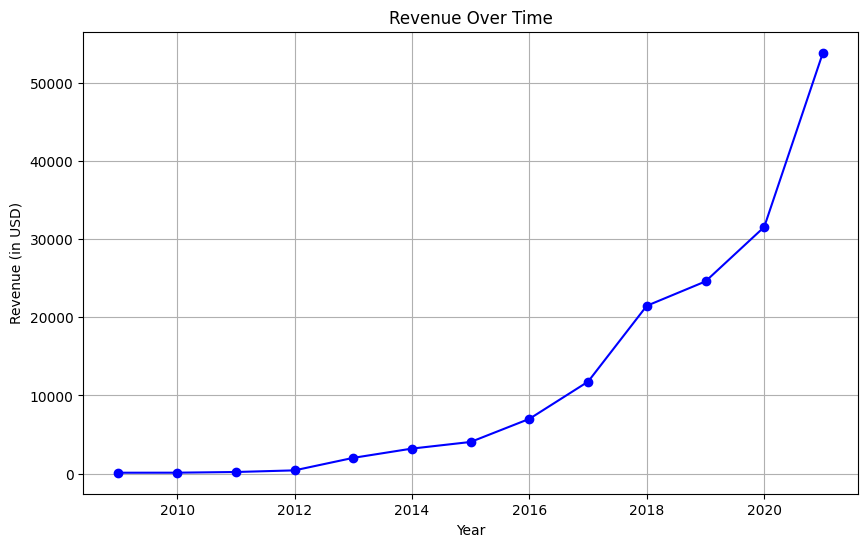

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (in USD)')
plt.grid(True)
plt.show()

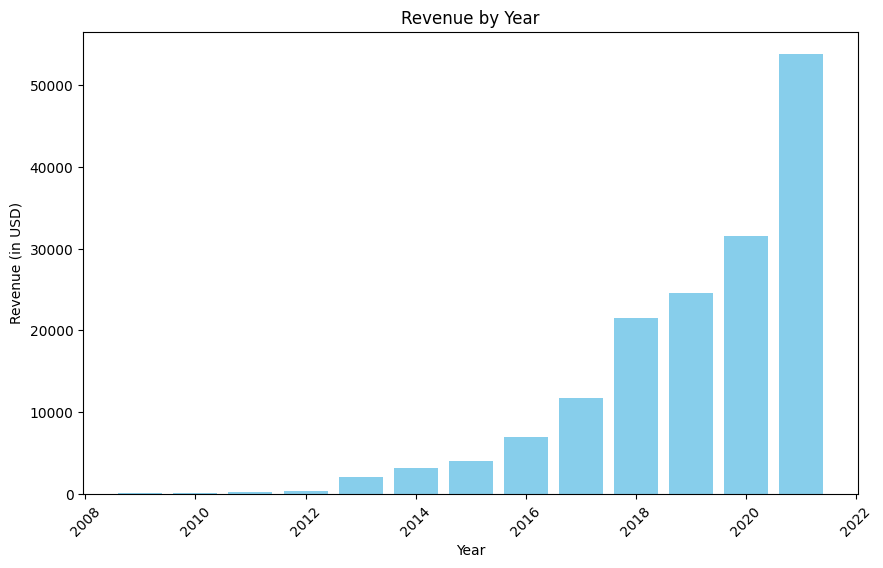

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Revenue'], color='skyblue')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (in USD)')
plt.xticks(rotation=45)
plt.show()

In [9]:
import dash
from dash import dcc, html
import plotly.express as px

# Create a Dash app
app = dash.Dash(__name__)

# Create a line chart using Plotly
fig = px.line(df, x='Year', y='Revenue', title='Revenue Over Time', markers=True)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Revenue Dashboard'),
    dcc.Graph(
        id='revenue-line-chart',
        figure=fig
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [1]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Fetch Tesla data
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_response = requests.get(tesla_url)
tesla_html_content = tesla_response.content
tesla_tables = pd.read_html(tesla_html_content)
tesla_df = tesla_tables[0]
tesla_df.columns = ['Year', 'Tesla Revenue']
tesla_df['Tesla Revenue'] = tesla_df['Tesla Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Fetch GME data
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_response = requests.get(gme_url)
gme_html_content = gme_response.content
gme_tables = pd.read_html(gme_html_content)
gme_df = gme_tables[0]
gme_df.columns = ['Year', 'GME Revenue']
gme_df['GME Revenue'] = gme_df['GME Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Merge Tesla and GME data
merged_df = pd.merge(tesla_df, gme_df, on='Year', how='inner')

# Create a Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Tesla vs GME Revenue Dashboard'),

    # Dropdown to select year
    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in merged_df['Year']],
        value=merged_df['Year'].min(),  # Default to the earliest year
        clearable=False
    ),

    # Radio buttons to select chart type
    html.Label("Select Chart Type:"),
    dcc.RadioItems(
        id='chart-type-radio',
        options=[
            {'label': 'Revenue Over Time', 'value': 'line'},
            {'label': 'Revenue by Year', 'value': 'bar'}
        ],
        value='line',  # Default to line chart
        inline=True
    ),

    # Graph to display the selected chart
    dcc.Graph(id='revenue-chart')
])

# Callback to update the chart based on user input
@app.callback(
    Output('revenue-chart', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('chart-type-radio', 'value')]
)
def update_chart(selected_year, chart_type):
    # Filter data based on the selected year
    filtered_df = merged_df[merged_df['Year'] == selected_year]

    # Create the chart based on the selected type
    if chart_type == 'line':
        fig = px.line(merged_df, x='Year', y=['Tesla Revenue', 'GME Revenue'],
                      title='Revenue Over Time',
                      labels={'value': 'Revenue (in USD)', 'variable': 'Company'})
    else:
        fig = px.bar(filtered_df, x='Year', y=['Tesla Revenue', 'GME Revenue'],
                     title=f'Revenue for {selected_year}',
                     labels={'value': 'Revenue (in USD)', 'variable': 'Company'},
                     barmode='group')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adame\AppData\Local\Temp\ipykernel_10532\2309759944.py:13: SyntaxWarning: invalid escape sequence '\$'
  tesla_df['Tesla Revenue'] = tesla_df['Tesla Revenue'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\adame\AppData\Local\Temp\ipykernel_10532\2309759944.py:22: SyntaxWarning: invalid escape sequence '\$'
  gme_df['GME Revenue'] = gme_df['GME Revenue'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\adame\AppData\Local\Temp\ipykernel_10532\2309759944.py:13: SyntaxWarning: invalid escape sequence '\$'
  tesla_df['Tesla Revenue'] = tesla_df['Tesla Revenue'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\adame\AppData\Local\Temp\ipykernel_10532\2309759944.py:22: SyntaxWarning: invalid escape sequence '\$'
  gme_df['GME Revenue'] = gme_df['GME Revenue']

NameError: name 'requests' is not defined

In [14]:
import plotly.express as px

# Create scatter plot
scatter_fig = px.scatter(
    merged_df,
    x='Tesla Revenue',
    y='GME Revenue',
    title='Tesla vs GME Revenue Comparison',
    labels={'Tesla Revenue': 'Tesla Revenue (in USD)', 'GME Revenue': 'GME Revenue (in USD)'},
    hover_name='Year',  # Show the year when hovering over points
    trendline='ols'  # Add a trendline
)

# Show the plot
scatter_fig.show()

In [15]:
import requests
import pandas as pd

# Fetch the HTML content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_content = response.content

# Parse the HTML table using pandas
tables = pd.read_html(html_content)

# Assuming the table you want is the first one
df = tables[0]
print(df.head())

# Rename columns if necessary
df.columns = ['Year', 'Revenue']

# Convert 'Revenue' to numeric (remove dollar signs and commas)
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
print(df.isnull().sum())

import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Fetch and clean the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_content = response.content
tables = pd.read_html(html_content)
df = tables[0]
df.columns = ['Year', 'Revenue']
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Create a Dash app
app = dash.Dash(__name__)

# Create a line chart
line_fig = px.line(df, x='Year', y='Revenue', title='GME Revenue Over Time', markers=True)

# Create a bar chart
bar_fig = px.bar(df, x='Year', y='Revenue', title='GME Revenue by Year', color='Revenue')

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='GME Revenue Dashboard'),

    # Line Chart
    dcc.Graph(
        id='revenue-line-chart',
        figure=line_fig
    ),

    # Bar Chart
    dcc.Graph(
        id='revenue-bar-chart',
        figure=bar_fig
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<>:20: SyntaxWarning:

invalid escape sequence '\$'

<>:37: SyntaxWarning:

invalid escape sequence '\$'

<>:20: SyntaxWarning:

invalid escape sequence '\$'

<>:37: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\adame\AppData\Local\Temp\ipykernel_31144\1314760114.py:20: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\adame\AppData\Local\Temp\ipykernel_31144\1314760114.py:37: SyntaxWarning:

invalid escape sequence '\$'



   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                                       $8,547  
3                                       $7,965  
4                                       $9,364  
Year       0
Revenue    0
dtype: int64
